# Combined Dataset - Feed Forward Neural Network
## openSMILE eGeMAPS Featureset

## Import relevant libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torcheval.metrics import R2Score

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import math

import sys

## Neural Network Training

### Import annotations dataset

In [2]:
df_annotations = pd.read_csv('../../data/combined/annotations/combined_static_annotations.csv')
df_annotations

song_id  valence_mean_mapped  arousal_mean_mapped
0         deam_2               -0.475               -0.500
1         deam_3               -0.375               -0.425
2         deam_4                0.175                0.125
3         deam_5               -0.150                0.075
4         deam_7                0.200                0.350
...          ...                  ...                  ...
2506   pmemo_993                0.525                0.725
2507   pmemo_996                0.125                0.750
2508   pmemo_997                0.325                0.425
2509   pmemo_999                0.550                0.750
2510  pmemo_1000                0.150                0.325

[2511 rows x 3 columns]

### Import the featureset

This is where you should change between normalised and standardised, and untouched featuresets!

In [3]:
df_opensmile_gemaps = pd.read_csv('../../data/combined/features/normalised_opensmile_egemaps_features.csv')

df_opensmile_gemaps

song_id  F0semitoneFrom27.5Hz_sma3nz_amean  \
0         deam_2                           0.203125   
1         deam_3                           0.045611   
2         deam_4                           0.194948   
3         deam_5                           0.365424   
4         deam_7                           0.104774   
...          ...                                ...   
2506   pmemo_993                           0.334791   
2507   pmemo_996                           0.483161   
2508   pmemo_997                           0.216852   
2509   pmemo_999                           0.330691   
2510  pmemo_1000                           0.330927   

      F0semitoneFrom27.5Hz_sma3nz_stddevNorm  \
0                                   0.228950   
1                                   0.212611   
2                                   0.441883   
3                                   0.343558   
4                                   0.202851   
...                                      ...   
2506                                0.619294   
2507                                0.411218   
2508                                0.725464   
2509                                0.747301   
2510                                0.650223   

      F0semitoneFrom27.5Hz_sma3nz_percentile20.0  \
0                                       0.176293   
1                                       0.047153   
2                                       0.092558   
3                                       0.239817   
4                                       0.072635   
...                                          ...   
2506                                    0.094841   
2507                                    0.255215   
2508                                    0.037013   
2509                                    0.047814   
2510                                    0.047705   

      F0semitoneFrom27.5Hz_sma3nz_percentile50.0  \
0                                       0.236449   
1                                       0.056424   
2                                       0.241098   
3                                       0.376944   
4                                       0.135790   
...                                          ...   
2506                                    0.265138   
2507                                    0.588625   
2508                                    0.089429   
2509                                    0.181547   
2510                                    0.224967   

      F0semitoneFrom27.5Hz_sma3nz_percentile80.0  \
0                                       0.230190   
1                                       0.111160   
2                                       0.222209   
3                                       0.521809   
4                                       0.175459   
...                                          ...   
2506                                    0.660498   
2507                                    0.633434   
2508                                    0.502778   
2509                                    0.757992   
2510                                    0.652585   

      F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2  \
0                                     0.116627   
1                                     0.117979   
2                                     0.196694   
3                                     0.382685   
4                                     0.164417   
...                                        ...   
2506                                  0.695839   
2507                                  0.494025   
2508                                  0.576947   
2509                                  0.857506   
2510                                  0.736995   

      F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope  \
0                                        0.089033   
1                                        0.057423   
2                                        0.233351   
3                                        0.134634   
4                             

In [4]:
df_opensmile_gemaps.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 89 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   song_id                                         2511 non-null   object 
 1   F0semitoneFrom27.5Hz_sma3nz_amean               2511 non-null   float64
 2   F0semitoneFrom27.5Hz_sma3nz_stddevNorm          2511 non-null   float64
 3   F0semitoneFrom27.5Hz_sma3nz_percentile20.0      2511 non-null   float64
 4   F0semitoneFrom27.5Hz_sma3nz_percentile50.0      2511 non-null   float64
 5   F0semitoneFrom27.5Hz_sma3nz_percentile80.0      2511 non-null   float64
 6   F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2        2511 non-null   float64
 7   F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope     2511 non-null   float64
 8   F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope   2511 non-null   float64
 9   F0semitoneFrom27.5Hz_sma3nz_meanFallingSl

Join both the featureset and annotation set together

In [5]:
df_opensmile_gemaps_whole = pd.merge(df_opensmile_gemaps, df_annotations, how='inner', on='song_id')
df_opensmile_gemaps_whole = df_opensmile_gemaps_whole.drop('song_id', axis=1)
df_opensmile_gemaps_whole

F0semitoneFrom27.5Hz_sma3nz_amean  \
0                              0.203125   
1                              0.045611   
2                              0.194948   
3                              0.365424   
4                              0.104774   
...                                 ...   
2506                           0.334791   
2507                           0.483161   
2508                           0.216852   
2509                           0.330691   
2510                           0.330927   

      F0semitoneFrom27.5Hz_sma3nz_stddevNorm  \
0                                   0.228950   
1                                   0.212611   
2                                   0.441883   
3                                   0.343558   
4                                   0.202851   
...                                      ...   
2506                                0.619294   
2507                                0.411218   
2508                                0.725464   
2509                                0.747301   
2510                                0.650223   

      F0semitoneFrom27.5Hz_sma3nz_percentile20.0  \
0                                       0.176293   
1                                       0.047153   
2                                       0.092558   
3                                       0.239817   
4                                       0.072635   
...                                          ...   
2506                                    0.094841   
2507                                    0.255215   
2508                                    0.037013   
2509                                    0.047814   
2510                                    0.047705   

      F0semitoneFrom27.5Hz_sma3nz_percentile50.0  \
0                                       0.236449   
1                                       0.056424   
2                                       0.241098   
3                                       0.376944   
4                                       0.135790   
...                                          ...   
2506                                    0.265138   
2507                                    0.588625   
2508                                    0.089429   
2509                                    0.181547   
2510                                    0.224967   

      F0semitoneFrom27.5Hz_sma3nz_percentile80.0  \
0                                       0.230190   
1                                       0.111160   
2                                       0.222209   
3                                       0.521809   
4                                       0.175459   
...                                          ...   
2506                                    0.660498   
2507                                    0.633434   
2508                                    0.502778   
2509                                    0.757992   
2510                                    0.652585   

      F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2  \
0                                     0.116627   
1                                     0.117979   
2                                     0.196694   
3                                     0.382685   
4                                     0.164417   
...                                        ...   
2506                                  0.695839   
2507                                  0.494025   
2508                                  0.576947   
2509                                  0.857506   
2510                                  0.736995   

      F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope  \
0                                        0.089033   
1                                        0.057423   
2                                        0.233351   
3                                        0.134634   
4                                        0.059515   
...                                           ...   
2506                                     0.542358   
2507        

#### Prepare dataframes for the neural network

Perform splitting of the dataframe into training and testing sets

In [6]:
features = df_opensmile_gemaps.drop('song_id', axis=1)
features

F0semitoneFrom27.5Hz_sma3nz_amean  \
0                              0.203125   
1                              0.045611   
2                              0.194948   
3                              0.365424   
4                              0.104774   
...                                 ...   
2506                           0.334791   
2507                           0.483161   
2508                           0.216852   
2509                           0.330691   
2510                           0.330927   

      F0semitoneFrom27.5Hz_sma3nz_stddevNorm  \
0                                   0.228950   
1                                   0.212611   
2                                   0.441883   
3                                   0.343558   
4                                   0.202851   
...                                      ...   
2506                                0.619294   
2507                                0.411218   
2508                                0.725464   
2509                                0.747301   
2510                                0.650223   

      F0semitoneFrom27.5Hz_sma3nz_percentile20.0  \
0                                       0.176293   
1                                       0.047153   
2                                       0.092558   
3                                       0.239817   
4                                       0.072635   
...                                          ...   
2506                                    0.094841   
2507                                    0.255215   
2508                                    0.037013   
2509                                    0.047814   
2510                                    0.047705   

      F0semitoneFrom27.5Hz_sma3nz_percentile50.0  \
0                                       0.236449   
1                                       0.056424   
2                                       0.241098   
3                                       0.376944   
4                                       0.135790   
...                                          ...   
2506                                    0.265138   
2507                                    0.588625   
2508                                    0.089429   
2509                                    0.181547   
2510                                    0.224967   

      F0semitoneFrom27.5Hz_sma3nz_percentile80.0  \
0                                       0.230190   
1                                       0.111160   
2                                       0.222209   
3                                       0.521809   
4                                       0.175459   
...                                          ...   
2506                                    0.660498   
2507                                    0.633434   
2508                                    0.502778   
2509                                    0.757992   
2510                                    0.652585   

      F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2  \
0                                     0.116627   
1                                     0.117979   
2                                     0.196694   
3                                     0.382685   
4                                     0.164417   
...                                        ...   
2506                                  0.695839   
2507                                  0.494025   
2508                                  0.576947   
2509                                  0.857506   
2510                                  0.736995   

      F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope  \
0                                        0.089033   
1                                        0.057423   
2                                        0.233351   
3                                        0.134634   
4                                        0.059515   
...                                           ...   
2506                                     0.542358   
2507        

In [7]:
targets = df_annotations.drop('song_id', axis=1)
targets

valence_mean_mapped  arousal_mean_mapped
0                  -0.475               -0.500
1                  -0.375               -0.425
2                   0.175                0.125
3                  -0.150                0.075
4                   0.200                0.350
...                   ...                  ...
2506                0.525                0.725
2507                0.125                0.750
2508                0.325                0.425
2509                0.550                0.750
2510                0.150                0.325

[2511 rows x 2 columns]

Perform 80-20 train-test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

Create tensors for X_train and X_test

In [9]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float64)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float64)

Create tensors for Y_train and Y_test

In [10]:
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float64)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float64)

Define neural network parameters and instantitate neural network

In [11]:
input_size = 1
hidden_size = 20 
output_size = 2  # Output size for valence and arousal
learning_rate = 0.001
criterion = nn.MSELoss()

In [73]:
num_epochs = 486

Set a random seed to ensure consistent initial weights of the neural network

In [74]:
# Set the seed
seed = 42
torch.manual_seed(seed)

Define the neural network

In [75]:
sys.path.insert(1, '../../models')
from feedforward_nn_combined import NeuralNetworkCombined

#### Training

Prepare input_train_data and target_train_labels

In [76]:
input_train_data = X_train_tensor.float()

# input_train_data = input_train_data.view(input_train_data.shape[1], -1)
print(input_train_data.shape)

target_train_labels = y_train_tensor

torch.Size([2008, 88])


Training loop

In [77]:
def train_model(num_epochs):
  model = NeuralNetworkCombined(input_size=input_train_data.shape[1])
  optimiser = optim.Adam(model.parameters(), lr=learning_rate)
  
  for epoch in range(num_epochs):
    optimiser.zero_grad()
    
    # forward pass
    output = model(input_train_data)

    # calculate loss
    loss = torch.sqrt(criterion(output.float(), target_train_labels.float()))

    # backward pass
    loss.backward()
    # update weights
    optimiser.step()

    print(f'Epoch {epoch + 1}, Loss: {math.sqrt(loss.item())}')

  print("Training completed.")
  return model

In [78]:
model = train_model(num_epochs)

Epoch 1, Loss: 0.608608056660508
Epoch 2, Loss: 0.6072594035909731
Epoch 3, Loss: 0.6059444896497498
Epoch 4, Loss: 0.6048359671397225
Epoch 5, Loss: 0.6038420698599245
Epoch 6, Loss: 0.6028901843793187
Epoch 7, Loss: 0.6019576867764338
Epoch 8, Loss: 0.601039584887341
Epoch 9, Loss: 0.6001393960911722
Epoch 10, Loss: 0.5992585438790449
Epoch 11, Loss: 0.5983963914900111
Epoch 12, Loss: 0.5975504762884002
Epoch 13, Loss: 0.5967190693596971
Epoch 14, Loss: 0.5958991806840841
Epoch 15, Loss: 0.5950863506263971
Epoch 16, Loss: 0.5942800565154883
Epoch 17, Loss: 0.5934824591746516
Epoch 18, Loss: 0.5926971135030078
Epoch 19, Loss: 0.5919317463194523
Epoch 20, Loss: 0.5911941984672082
Epoch 21, Loss: 0.5904950720559617
Epoch 22, Loss: 0.5898327100112193
Epoch 23, Loss: 0.5891928207369252
Epoch 24, Loss: 0.5885742622959038
Epoch 25, Loss: 0.5879734272483164
Epoch 26, Loss: 0.5873937186022518
Epoch 27, Loss: 0.5868345895490317
Epoch 28, Loss: 0.5862884233567701
Epoch 29, Loss: 0.5857544167906

## Neural Network Testing

Prepare input_test_data and target_test_labels

In [79]:
input_test_data = X_test_tensor.float()

# input_test_data = input_test_data.view(input_test_data.shape[1], -1)
print(input_test_data.shape)

target_test_labels = y_test_tensor

torch.Size([503, 88])


Generating scores

In [80]:
def test_model(trained_model):
  with torch.no_grad():
    test_pred = trained_model(input_test_data)
    test_loss = criterion(test_pred.float(), target_test_labels)

    # Separate the output into valence and arousal
    valence_pred = test_pred[:, 0]
    arousal_pred = test_pred[:, 1]
        
    valence_target = target_test_labels[:, 0]
    arousal_target = target_test_labels[:, 1]

     # Calculate RMSE for valence and arousal separately
    valence_rmse = math.sqrt(mean_squared_error(valence_pred, valence_target))
    arousal_rmse = math.sqrt(mean_squared_error(arousal_pred, arousal_target))

  print(f'Valence RMSE: {round(valence_rmse, 4)}')
  print(f'Arousal RMSE: {round(arousal_rmse, 4)}')

  rmse = math.sqrt(test_loss.item())
  print(f'Test RMSE: {round(rmse, 4)}')

  metric = R2Score(multioutput="raw_values")
  metric.update(test_pred, target_test_labels)
  adjusted_r2_score = metric.compute()
  print(f'Test R^2 score: {adjusted_r2_score}')

  metric = R2Score()
  metric.update(test_pred, target_test_labels)
  r2_score = metric.compute()
  print(f'Test R^2 score (overall): {round(r2_score.item(), 4)}')

  metric = R2Score(multioutput="raw_values", num_regressors=input_test_data.shape[1])
  metric.update(test_pred, target_test_labels)
  adjusted_r2_score = metric.compute()
  print(f'Test Adjusted R^2 score: {adjusted_r2_score}')

  return test_pred, rmse, adjusted_r2_score, r2_score

In [81]:
test_pred, rmse, adjusted_r2_score, r2_score = test_model(model)

Valence RMSE: 0.2304
Arousal RMSE: 0.2427
Test RMSE: 0.2366
Test R^2 score: tensor([0.5003, 0.5716], dtype=torch.float64)
Test R^2 score (overall): 0.5359
Test Adjusted R^2 score: tensor([0.3941, 0.4805], dtype=torch.float64)


In [82]:
torch.save(model.state_dict(), '../../models/combined_feedforward_nn_opensmile_egemaps_normalised.pt')

True values (test set)

In [22]:
target_test_labels

tensor([[ 0.0500, -0.0500],
        [ 0.2500,  0.1500],
        [ 0.0250,  0.4250],
        ...,
        [ 0.4000,  0.4000],
        [ 0.0250, -0.2000],
        [ 0.6500,  0.6750]], dtype=torch.float64)

Predicted values

In [23]:
test_pred

tensor([[ 0.0214,  0.0915],
        [ 0.2831,  0.3255],
        [ 0.3956,  0.4557],
        ...,
        [ 0.1469,  0.1938],
        [-0.0015, -0.0100],
        [ 0.2945,  0.3166]])

In [24]:
pred_valence = test_pred[:, 0]
pred_arousal = test_pred[1]
real_valence = target_test_labels[0]
real_arousal = target_test_labels[1]


metric = R2Score(multioutput='raw_values')
metric.update(test_pred, target_test_labels)
print(metric.compute())

tensor([0.5010, 0.5660], dtype=torch.float64)


## Analyse relationship between epochs and r^2 score

Create lists to store the epochs and R^2 scores

In [25]:
num_epochs_list = [i for i in range(1, 501)]
adjusted_r2_scores_valence_list = []
adjusted_r2_scores_arousal_list = []
r2_scores_list = []
rmse_list = []

Conduct training and testing for each num_epochs

In [26]:
for num_epochs in num_epochs_list:
  # Set the seed
  torch.manual_seed(seed)

  print(f'Num of epochs: {num_epochs}')
  
  model = train_model(num_epochs)

  print("Training completed.")
  print("Testing model...")

  test_pred, rmse, adjusted_r2_score, r2_score = test_model(model)
  adjusted_r2_scores_valence_list.append(adjusted_r2_score[0])
  adjusted_r2_scores_arousal_list.append(adjusted_r2_score[1])
  r2_scores_list.append(r2_score)
  rmse_list.append(rmse)

print("Completed.")

Num of epochs: 1
Epoch 1, Loss: 0.608608056660508
Training completed.
Training completed.
Testing model...
Valence RMSE: 0.3404
Arousal RMSE: 0.4118
Test RMSE: 0.3778
Test R^2 score: tensor([-0.0911, -0.2335], dtype=torch.float64)
Test R^2 score (overall): -0.1623
Test Adjusted R^2 score: tensor([-0.3231, -0.4956], dtype=torch.float64)
Num of epochs: 2
Epoch 1, Loss: 0.608608056660508
Epoch 2, Loss: 0.6072594035909731
Training completed.
Training completed.
Testing model...
Valence RMSE: 0.3387
Arousal RMSE: 0.4101
Test RMSE: 0.3761
Test R^2 score: tensor([-0.0800, -0.2237], dtype=torch.float64)
Test R^2 score (overall): -0.1519
Test Adjusted R^2 score: tensor([-0.3096, -0.4838], dtype=torch.float64)
Num of epochs: 3
Epoch 1, Loss: 0.608608056660508
Epoch 2, Loss: 0.6072594035909731
Epoch 3, Loss: 0.6059444896497498
Training completed.
Training completed.
Testing model...
Valence RMSE: 0.3374
Arousal RMSE: 0.4086
Test RMSE: 0.3747
Test R^2 score: tensor([-0.0720, -0.2148], dtype=torch.

### Plot the graph to visualise the relationship the evaluation metrics

Import relevant libraries

In [27]:
import matplotlib.pyplot as plt

#### RMSE vs. num_epochs

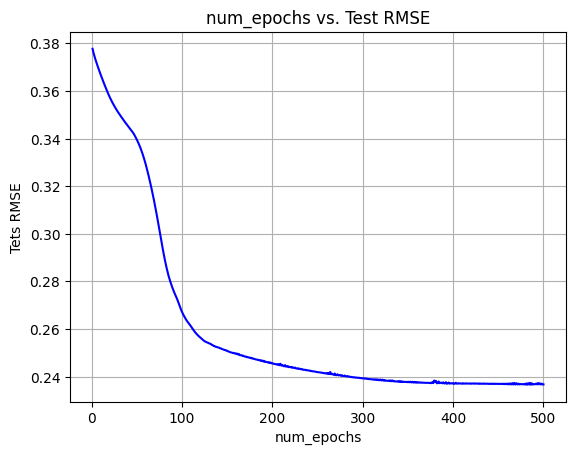

In [28]:
plt.plot(num_epochs_list, rmse_list, color='b', linestyle='-')
plt.title('num_epochs vs. Test RMSE')
plt.xlabel('num_epochs')
plt.ylabel('Tets RMSE') 
plt.grid(True)
plt.show() 

In [29]:
min_rmse = min(rmse_list)
corresponding_r2_score = r2_scores_list[rmse_list.index(min_rmse)]
corresponding_num_epochs = num_epochs_list[rmse_list.index(min_rmse)]

print(f'Min RMSE score: {min_rmse}')
print(f'Corresponding R^2 SCore: {corresponding_r2_score}')
print(f'Corresponding num_epochs: {corresponding_num_epochs}')

Min RMSE score: 0.23659647508751494
Corresponding R^2 SCore: 0.5359489297300098
Corresponding num_epochs: 486


Test R^2 Score vs. num_epochs

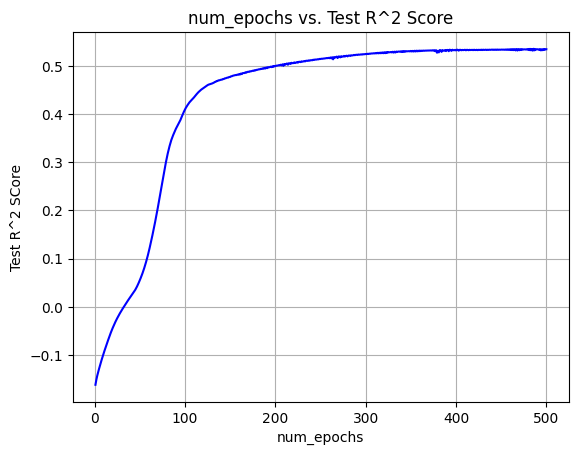

In [30]:
plt.plot(num_epochs_list, r2_scores_list, color='b', linestyle='-')
plt.title('num_epochs vs. Test R^2 Score')
plt.xlabel('num_epochs')
plt.ylabel('Test R^2 SCore') 
plt.grid(True)
plt.show() 

In [31]:
max_r2_score = max(r2_scores_list)
corresponding_rmse = rmse_list[r2_scores_list.index(max_r2_score)]
corresponding_num_epochs = num_epochs_list[r2_scores_list.index(max_r2_score)]

print(f'Max R^2 score: {max_r2_score}')
print(f'Corresponding RMSE: {corresponding_rmse}')
print(f'Corresponding num_epochs: {corresponding_num_epochs}')

Max R^2 score: 0.5359489297300098
Corresponding RMSE: 0.23659647508751494
Corresponding num_epochs: 486


Test Adjusted R^2 Score (Valence) vs. num_epochs

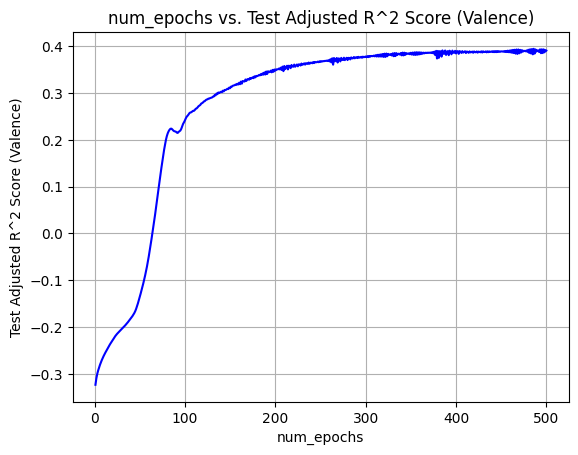

In [32]:
plt.plot(num_epochs_list, adjusted_r2_scores_valence_list, color='b', linestyle='-')
plt.title('num_epochs vs. Test Adjusted R^2 Score (Valence)')
plt.xlabel('num_epochs')
plt.ylabel('Test Adjusted R^2 Score (Valence)') 
plt.grid(True)
plt.show() 

In [33]:
max_r2_score_valence = max(adjusted_r2_scores_valence_list)
corresponding_rmse = rmse_list[adjusted_r2_scores_valence_list.index(max_r2_score_valence)]
corresponding_num_epochs = num_epochs_list[adjusted_r2_scores_valence_list.index(max_r2_score_valence)]

print(f'Max R^2 score: {max_r2_score_valence}')
print(f'Corresponding RMSE: {corresponding_rmse}')
print(f'Corresponding num_epochs: {corresponding_num_epochs}')

Max R^2 score: 0.39407562907110083
Corresponding RMSE: 0.23659647508751494
Corresponding num_epochs: 486


#### Test Adjusted R^2 Score (Arousal) vs. num_epochs

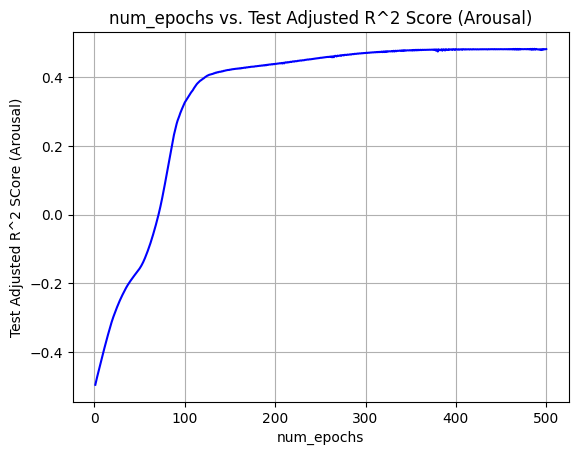

In [34]:
plt.plot(num_epochs_list, adjusted_r2_scores_arousal_list, color='b', linestyle='-')
plt.title('num_epochs vs. Test Adjusted R^2 Score (Arousal)')
plt.xlabel('num_epochs')
plt.ylabel('Test Adjusted R^2 SCore (Arousal)') 
plt.grid(True)
plt.show() 

In [35]:
max_r2_score_arousal = max(adjusted_r2_scores_arousal_list)
corresponding_rmse = rmse_list[adjusted_r2_scores_arousal_list.index(max_r2_score_arousal)]
corresponding_num_epochs = num_epochs_list[adjusted_r2_scores_arousal_list.index(max_r2_score_arousal)]

print(f'Max R^2 score: {max_r2_score_arousal}')
print(f'Corresponding RMSE: {corresponding_rmse}')
print(f'Corresponding num_epochs: {corresponding_num_epochs}')

Max R^2 score: 0.4831423801194106
Corresponding RMSE: 0.23724183641592522
Corresponding num_epochs: 487
